# Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Объявление данных

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_parquet(r'data11.parquet')

# Применение к данным OneHotEncoding

In [3]:
one_hot_data = pd.get_dummies(data, columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], prefix='OHE')

# Выборка данных для обучения модели

In [4]:
X = one_hot_data.values
y = one_hot_data['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVR

In [5]:
svr = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.2, kernel='rbf'))
svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=0.2))])

# Оценка модели

In [6]:
print(f"Коэффициент детерминации (R^2): {str(svr.score(X_test, y_test)*100)[:5]} %")

Коэффициент детерминации (R^2): 89.27 %


# Генерируем равномерно распределенные точки для предсказания моделью

In [7]:
X_plot = np.linspace(X.min(), X.max(), 842)
y_plot = svr.predict(X_test)

# Визуализируем результат

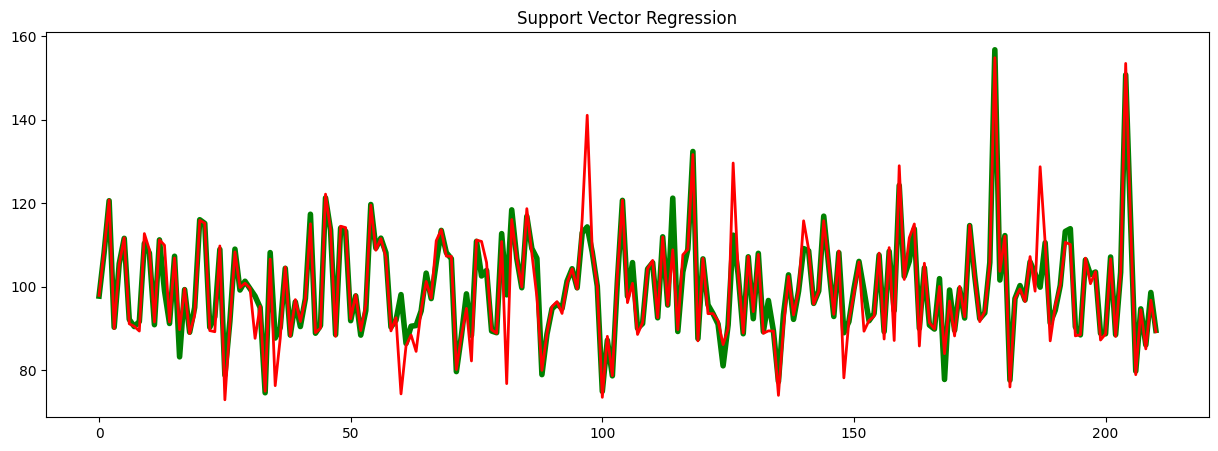

In [13]:
plt.figure(figsize=(15, 5))

plt.plot(y_plot[::4], color="green", linewidth=4)
plt.plot(y_test[::4], color="red", linewidth=2)
plt.title('Support Vector Regression')
plt.show()